In [1]:
!pip install -q wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [20]:
!pip install -q kaggle

In [21]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [22]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [23]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [24]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
!unzip -qq utkface-new.zip

replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [26]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
# import wandb

In [11]:
import wandb.keras
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

In [12]:
width = height = 124

In [13]:
images = []     # X
ages = []       # Y

for image_name in os.listdir("UTKFace"):
    parts = image_name.split('_')
    age = int(parts[0])
    ages.append(age)

    image = cv2.imread("UTKFace/" + image_name)
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

In [14]:
images = pd.Series(images, name='Images')
ages = pd.Series(ages, name='Ages')

df = pd.concat([images, ages], axis=1)
df.head()

,Images,Ages
0,"[[[27, 15, 19], [27, 15, 19], [28, 16, 20], [2...",26
1,"[[[80, 82, 81], [78, 82, 83], [77, 82, 84], [7...",36
2,"[[[109, 57, 34], [104, 54, 31], [110, 65, 43],...",79
3,"[[[149, 159, 151], [122, 131, 126], [78, 88, 8...",29
4,"[[[78, 42, 15], [84, 48, 22], [81, 47, 22], [7...",8


79


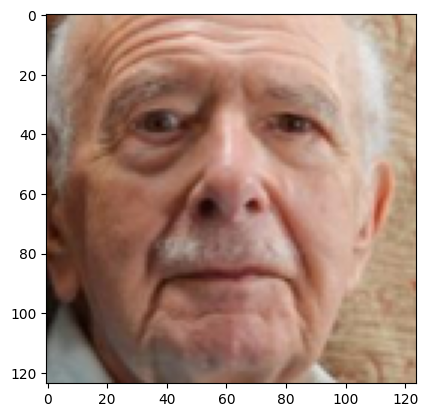

In [17]:
print(df["Ages"][2])
plt.imshow(df["Images"][2])
plt.show()

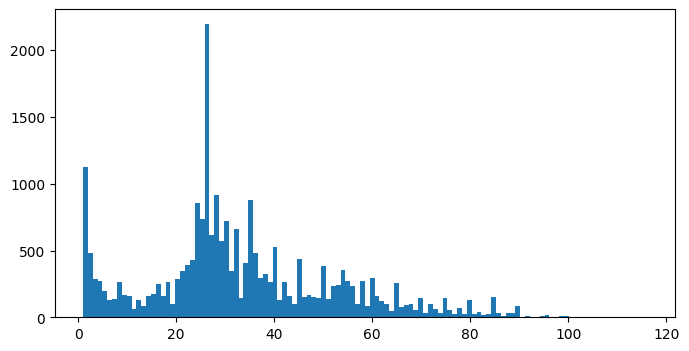

In [18]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [19]:
exactly_26 = df[df["Ages"].isin([26])]      # 26 year olds
exactly_26.head()

,Images,Ages
0,"[[[27, 15, 19], [27, 15, 19], [28, 16, 20], [2...",26
21,"[[[157, 103, 67], [159, 105, 69], [162, 108, 7...",26
64,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",26
78,"[[[152, 95, 66], [160, 103, 74], [169, 110, 82...",26
84,"[[[0, 0, 4], [1, 1, 3], [0, 0, 0], [1, 2, 0], ...",26


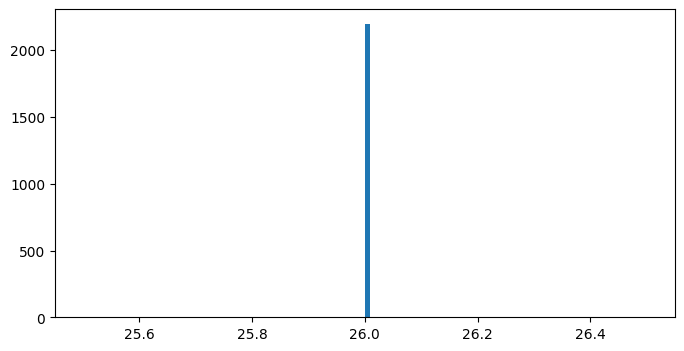

In [20]:
plt.figure(figsize=(8, 4))
plt.hist(exactly_26["Ages"], bins=df["Ages"].max())
plt.show()

In [21]:
under_26 = df[df["Ages"] < 26]
over_26 = df[df["Ages"] > 26]

exactly_26 = exactly_26.sample(frac=0.6)    # keep 0.6 of 26 year olds

df = pd.concat([under_26, exactly_26, over_26], axis=0)

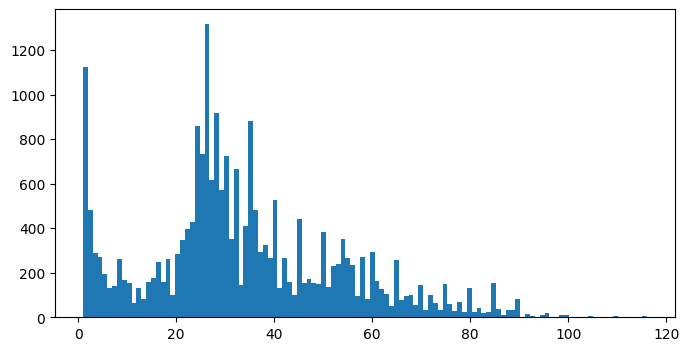

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [23]:
del exactly_26
del under_26
del over_26

In [24]:
ages_22to30 = df[(df['Ages']>=22) & (df['Ages']<= 30 )]

under_22 = df[df["Ages"] < 22]
over_30 = df[df["Ages"] > 30]
ages_22to30 = ages_22to30.sample(frac=0.6)

df = pd.concat([under_22, ages_22to30, over_30], axis=0)

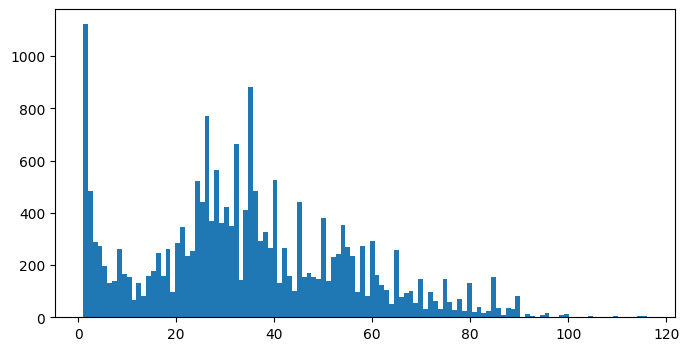

In [25]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [26]:
del ages_22to30
del under_22
del over_30

In [27]:
ages_35to40 = df[(df['Ages']>=35) & (df['Ages']<= 40)]

under_35 = df[df["Ages"] < 35]
over_40 = df[df["Ages"] > 40]
ages_35to40 = ages_35to40.sample(frac=0.6)

df = pd.concat([under_35, ages_35to40, over_40], axis=0)

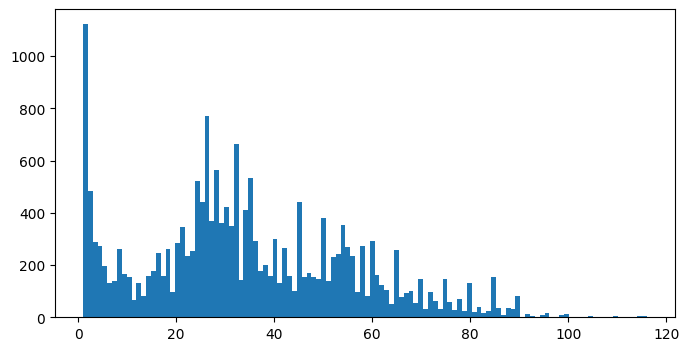

In [28]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [29]:
del ages_35to40
del under_35
del over_40

In [31]:
under_4 = df[df["Ages"] < 4]    # 4 year olds
over_4 = df[df["Ages"] >= 4]    # others

under_4 = under_4.sample(frac=0.3)      # keep 0.3 of 4 year olds
df = pd.concat([under_4, over_4], axis=0)

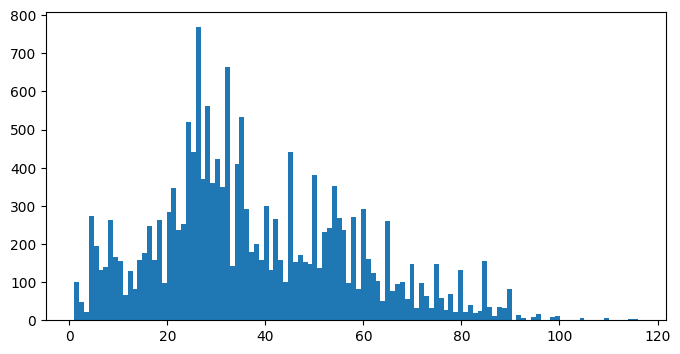

In [32]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [33]:
del under_4
del over_4

In [34]:
df = df[df['Ages'] <= 80]

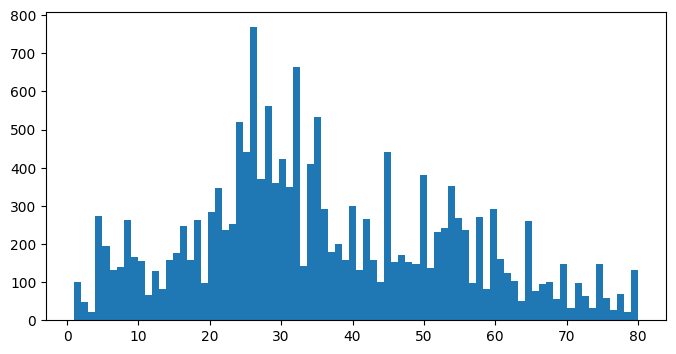

In [35]:
plt.figure(figsize=(8, 4))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [ ]:
# exactly_32 = df[df["Ages"].isin([32])]      # 32 year olds

# under_32 = df[df["Ages"] < 32]
# over_32 = df[df["Ages"] > 32]

# exactly_32 = exactly_32.sample(frac=0.6)    # keep 0.5 of 32 year olds

# df = pd.concat([under_32, exactly_32, over_32], axis=0)

In [36]:
# convert from pandas dataframe to numpy array

X = np.array(df["Images"].values.tolist())
Y = np.array(df["Ages"].values.tolist())

In [37]:
del images
del ages

In [38]:
X.shape

(16832, 124, 124, 3)

In [39]:
Y.shape

(16832,)

In [40]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2)

In [41]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(13465, 124, 124, 3)
(3367, 124, 124, 3)
(13465,)
(3367,)


In [42]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_data = image_data_generator.flow(
    X_train,
    Y_train,
    shuffle=True
)

validation_data = image_data_generator.flow(
    X_validation,
    Y_validation,
    batch_size=16,
    shuffle=False
)

In [43]:
del X
del Y
del df

In [44]:
run = wandb.init(project="age_prediction")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [45]:
config = wandb.config

In [46]:
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models.keras"),
]

## create model

In [47]:
base_model = tf.keras.applications.EfficientNetV2M(
    include_top=False,
    weights="imagenet",     #Transfer Learning
    input_shape=(width, height, 3),
    pooling="avg"
)

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [48]:
for layer in base_model.layers:
    layer.trainable=False       #freeze🧊

In [49]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='relu')
])

In [50]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [51]:
history = model.fit(train_data,
          validation_data=validation_data,
          epochs=50,
          callbacks=wandb_callbacks)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 ━━━━━━━━━━━━━━━━━━━━ 200s 292ms/step - loss: 1581.9773 - val_loss: 1283.6907
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - loss: 1212.5686 - val_loss: 998.8902
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 55s 130ms/step - loss: 967.8806 - val_loss: 794.0137
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 53s 126ms/step - loss: 796.4823 - val_loss: 643.6252
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 58s 137ms/step - loss: 655.9465 - val_loss: 532.7169
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 58s 139ms/step - loss: 579.7718 - val_loss: 457.4176
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 78s 128ms/step - loss: 528.5590 - val_loss: 407.1908
Epoch 8/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 73s 107ms/step - loss: 478.9800 - val_loss: 374.6706
Epoch 9/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - loss: 450.7924 - val_loss: 356.4838
Epoch 10/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 84s 143ms/step - loss: 436.3083 - val_loss: 346.4481
Epoch 11/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - loss: 427.9622 - v

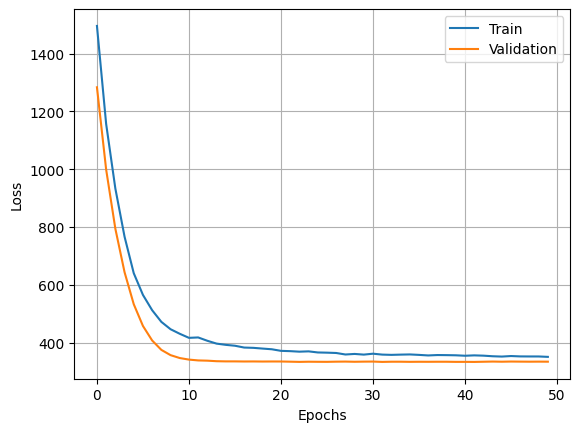

In [52]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [53]:
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment55/weights/age_prediction.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment55/weights/age_prediction.keras")

In [54]:
loss = model.evaluate(validation_data)
print("validation loss:" , loss)

211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 329.7027
validation loss: 334.1388854980469


## inference:

In [10]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment55/weights/age_prediction.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
width = height = 124

In [33]:
len(os.listdir("UTKFace"))
os.listdir("UTKFace")[12000]

'40_0_0_20170116000712384.jpg.chip.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
predicted age: [[[36.022045]]]


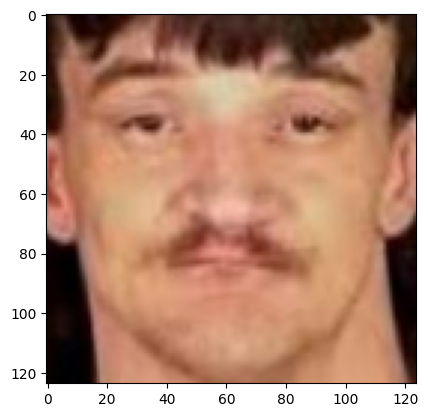

In [34]:
image = cv2.imread("/content/UTKFace/40_0_0_20170116000712384.jpg.chip.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (width, height))
plt.imshow(image)
image = image / 255.0
image = image.reshape(1, width, height, 3)

output = model.predict(image)
print("predicted age:", output)